<a href="https://colab.research.google.com/github/202311003/idm_assignment_1/blob/202311003/202311003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dataset

In [5]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [6]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
replace data/the weather of 155 countries in 2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#Importing library

In [7]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [8]:
df = pd.read_csv('data/the weather of 155 countries in 2020.csv')
df.head()

<ipython-input-8-4a0b852c579a>:1: DtypeWarning: Columns (15,16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/the weather of 155 countries in 2020.csv')


,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026119 entries, 0 to 1026118
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1026119 non-null  object 
 1   Country/Region   1026119 non-null  object 
 2   DATE             1026119 non-null  object 
 3   Year             1026119 non-null  int64  
 4   Month            1026119 non-null  int64  
 5   Day              1026119 non-null  int64  
 6   PRCP             718382 non-null   float64
 7   SNWD             214350 non-null   float64
 8   TAVG             789773 non-null   float64
 9   TMAX             652635 non-null   float64
 10  TMIN             680160 non-null   float64
 11  SNOW             103991 non-null   float64
 12  LATITUDE         102307 non-null   float64
 13  LONGITUDE        102307 non-null   float64
 14  ELEVATION        102307 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

(1026119, 23)

In [35]:
df.shape

(1026119, 23)

In [9]:
df.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                307737
SNWD                811769
TAVG                236346
TMAX                373484
TMIN                345959
SNOW                922128
LATITUDE            923812
LONGITUDE           923812
ELEVATION           923812
PRCP_ATTRIBUTES    1020112
TAVG_ATTRIBUTES    1022269
TMAX_ATTRIBUTES    1020482
TMIN_ATTRIBUTES    1020245
DAPR               1024856
MDPR               1026038
WESD               1026117
SNWD_ATTRIBUTES    1025765
dtype: int64

Certain columns like precipitation (PRCP), snow depth (SNWD), temperature averages (TAVG), maximum temperature (TMAX), and minimum temperature (TMIN) exhibit missing values. Additionally, attributes related to these parameters are also recorded, with occasional missing data.

In [10]:
weather_df = df.drop(['Year','PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
                        'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'], axis=1)
country_count = df['Country/Region'].unique()
station_count = df['STATION'].unique()
print(len(country_count))
print(len(station_count))

155
5152


Showing number of unique countries and stations count, and removing few columns which was almost empty.

#Data preprocessing and transformation and Finding Correlation after filling empty data

In [11]:
import statistics  # Import the statistics module to calculate the mode
from sklearn.preprocessing import LabelEncoder

weather_df_copy = weather_df.copy()

##### ENCODING DATA #####
countries = weather_df_copy['Country/Region']
stations = weather_df_copy['STATION']
label_encoder = LabelEncoder()
encoded_countries = label_encoder.fit_transform(countries)
encoded_stations = label_encoder.fit_transform(stations)
weather_df_copy['Country/Region'] = encoded_countries
weather_df_copy['STATION'] = encoded_stations

################ USED #######################
def calculate_mode(data):
    try:
        return statistics.mode(data)
    except statistics.StatisticsError:
        return None  # Return None if there is no unique mode

################ NOT USED #######################
# def calculate_mode(data):
#     # Convert the data to a list of integers and filter out None values
#     data_as_int = [int(value) for value in data if not math.isnan(value)]

#     try:
#         mode_value = statistics.mode(data_as_int)
#         return mode_value
#     except statistics.StatisticsError:
#         return None  # Return None if there is no unique mode

################ USED #######################
average_temp = weather_df_copy.groupby(['Country/Region', 'Month'])['TAVG'].apply(calculate_mode).to_dict()
average_temp_min = weather_df_copy.groupby(['Country/Region', 'Month'])['TMIN'].apply(calculate_mode).to_dict()
average_temp_max = weather_df_copy.groupby(['Country/Region', 'Month'])['TMAX'].apply(calculate_mode).to_dict()
average_prcp = weather_df_copy.groupby(['Country/Region', 'Month'])['PRCP'].apply(calculate_mode).to_dict()


################ NOT USED #######################
# average_temp = weather_df_copy.groupby(['Country/Region', 'Month'])['TAVG'].median().to_dict()
# average_temp_min = weather_df_copy.groupby(['Country/Region', 'Month'])['TMIN'].median().to_dict()
# average_temp_max = weather_df_copy.groupby(['Country/Region', 'Month'])['TMAX'].median().to_dict()
# average_prcp = weather_df_copy.groupby(['Country/Region', 'Month'])['PRCP'].median().to_dict()

################ USED #######################
def fill_missing_avg_temp(row,temp_type):
    key = (row['Country/Region'], row['Month'])
    if(temp_type == 'TAVG'):
      return average_temp.get(key, row[temp_type])
    elif(temp_type == 'TMIN'):
      return average_temp_min.get(key, row[temp_type])
    elif(temp_type == 'PRCP'):
      return average_prcp.get(key, row[temp_type])
    else:
      return average_temp_max.get(key, row[temp_type])

################ USED #######################
weather_df_copy['TAVG'] = weather_df_copy.apply(fill_missing_avg_temp, args=['TAVG'] ,axis = 1)
weather_df_copy['TMIN'] = weather_df_copy.apply(fill_missing_avg_temp, args=['TMIN'] ,axis = 1)
weather_df_copy['TMAX'] = weather_df_copy.apply(fill_missing_avg_temp, args=['TMAX'] ,axis = 1)
weather_df_copy['PRCP'] = weather_df_copy.apply(fill_missing_avg_temp, args=['PRCP'] ,axis = 1)

weather_df_copy.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP               31358
SNWD              811769
TAVG                   0
TMAX               23794
TMIN               14280
SNOW              922128
LATITUDE          923812
LONGITUDE         923812
ELEVATION         923812
dtype: int64

This step contains mjor operations of EDA


1.   We are using label encoder to encode the object data in Station and Country/Region column.
2.   We are filling empty cells of TAVG, TMIN, TMAX, and PRCP columns by finding mode of perticular country with given month.



In [12]:
weather_df_copy.isnull().sum()
weather_df_copy = weather_df_copy.dropna(subset=['TMIN','TMAX','PRCP'])
# columns_to_drop = ['SNOW', 'LATITUDE','LONGITUDE','ELEVATION', 'SNWD']
# weather_df_copy.drop(columns = columns_to_drop, axis=1)

columns_to_drop = ['SNOW', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'SNWD']
weather_df_copy = weather_df_copy.drop(columns=columns_to_drop)


weather_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985196 entries, 0 to 1026118
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STATION         985196 non-null  int64  
 1   Country/Region  985196 non-null  int64  
 2   DATE            985196 non-null  object 
 3   Month           985196 non-null  int64  
 4   Day             985196 non-null  int64  
 5   PRCP            985196 non-null  float64
 6   TAVG            985196 non-null  float64
 7   TMAX            985196 non-null  float64
 8   TMIN            985196 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 75.2+ MB


After filling empty cell we are removing those rows whose data still remained unfilled becouse of no data for perticular country and given month was found while calculating the mode and filling data.

We are also removing some of the columns which has too much missing data.

<ipython-input-37-28a7a1a20e44>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_df_copy.corr(), annot=True);


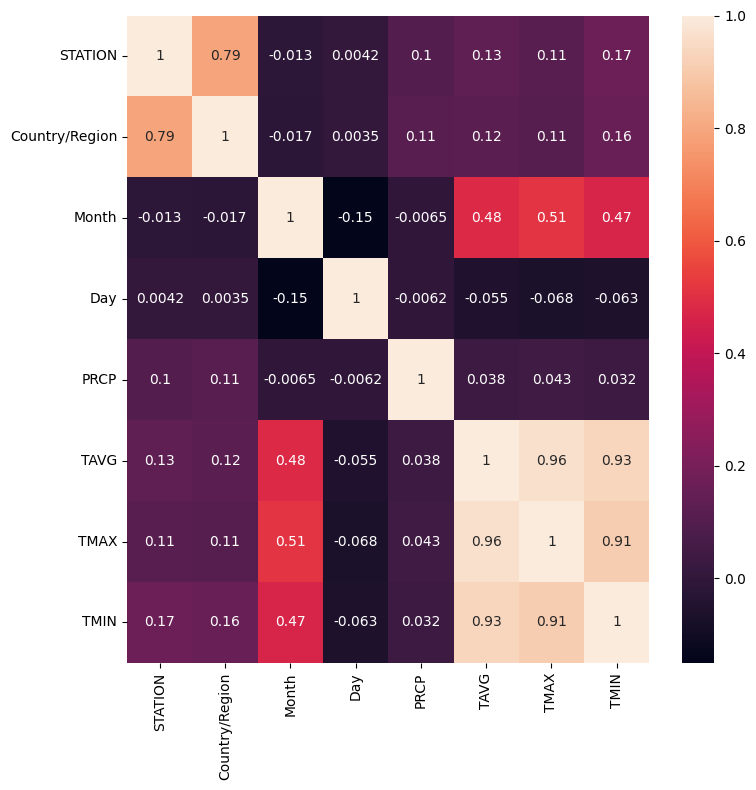

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(weather_df_copy.corr(), annot=True);
plt.tight_layout()

1.   From the heatmap we can observe that TAVG,TMIN,TMIX has very strong relation.
2.   Country has very good relation with stations
3.   Months also have some relation with TAVG,TMIN,TMAX.




In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(weather_df_copy[["STATION","Country/Region","Month","Day","TAVG"]], weather_df_copy["TMIN"], test_size=0.2)


size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape


((788156, 5), (197040, 5))

In [24]:
X_train_scaled

array([[-1.34363222, -0.99679897,  0.39481749,  1.38577534, -0.40257316],
       [-1.52337139, -0.99679897,  0.39481749,  1.61422479, -0.40257316],
       [ 1.04883223,  0.95727227, -1.83297298,  1.04310115,  1.20351725],
       ...,
       [-1.67518297, -1.11311273,  1.50871273, -0.67026978,  1.29219709],
       [ 0.13438233,  1.63189211, -0.71907775, -1.58406761,  1.3611703 ],
       [-0.32821331,  1.5388411 , -1.83297298,  1.61422479, -1.20069171]])

In [25]:
X_test_scaled

array([[-1.29708622, -0.99679897, -0.71907775, -1.24139342, -1.19083839],
       [-1.55487946, -0.99679897,  0.95176511,  0.01507859,  0.09009261],
       [ 0.17305132,  0.44549171,  1.50871273,  0.81465169,  1.49911672],
       ...,
       [ 0.34204911,  0.11981317,  1.50871273,  0.92887642,  1.06557084],
       [ 0.94356666,  0.70138199,  0.39481749,  1.38577534, -0.00844054],
       [-0.40769955, -0.92701071,  0.39481749,  1.38577534,  1.00645095]])

#Regression Models

##Linear Regression

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R-squared (R²): {r2}")

MAE: 2.5208005685605746
RMSE: 3.342600803775712
R-squared (R²): 0.8769824407994815


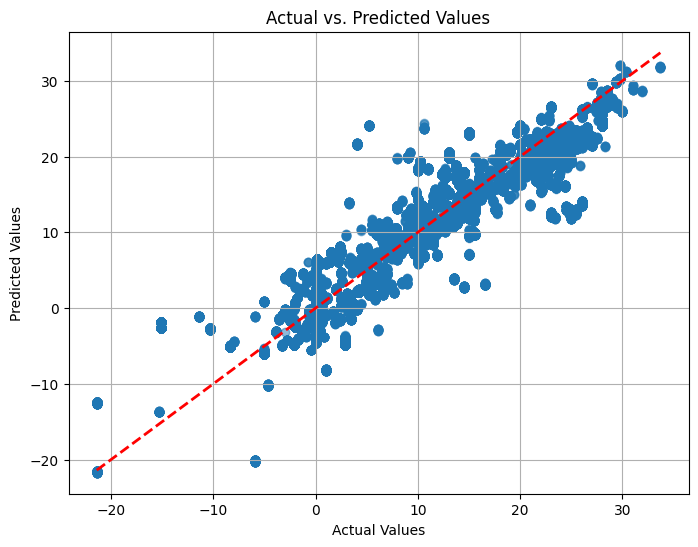

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)


# Show the plot
plt.show()

##Polynomial Regression

In [28]:
degree = 2  # You can adjust this hyperparameter

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error (MSE): 9.680385014483944
R-squared (R²): 0.8934163202310743


## Stochastic Gradient Descent Regression

In [31]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.1, learning_rate='constant', eta0=0.01)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R-squared (R²): {r2}")

MAE: 2.697184113884371
RMSE: 3.52676635281372
R-squared (R²): 0.8630533361654232


## Stochastic Gradient Descent Regression (Hyperparameter Tuning).

In [21]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create an SGDRegressor model
model = SGDRegressor()

# Define a hyperparameter grid to search over
param_grid = {
    'max_iter': [1000, 2000],          # Maximum number of iterations
    'tol': [1e-3, 1e-4],              # Tolerance for stopping criteria
    'alpha': [0.01, 0.1, 1.0],        # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate update strategy
    'eta0': [0.01, 0.1, 1.0]          # Initial learning rate
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to your data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a model with the best hyperparameters
best_model = SGDRegressor(**best_params)

# Fit the best model to the training data
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R-squared (R²): {r2}")


Best Hyperparameters: {'alpha': 0.01, 'eta0': 1.0, 'learning_rate': 'optimal', 'max_iter': 2000, 'tol': 0.0001}
MAE: 2.5403256035426374
RMSE: 3.356887141360582
R-squared (R²): 0.8759336772392798


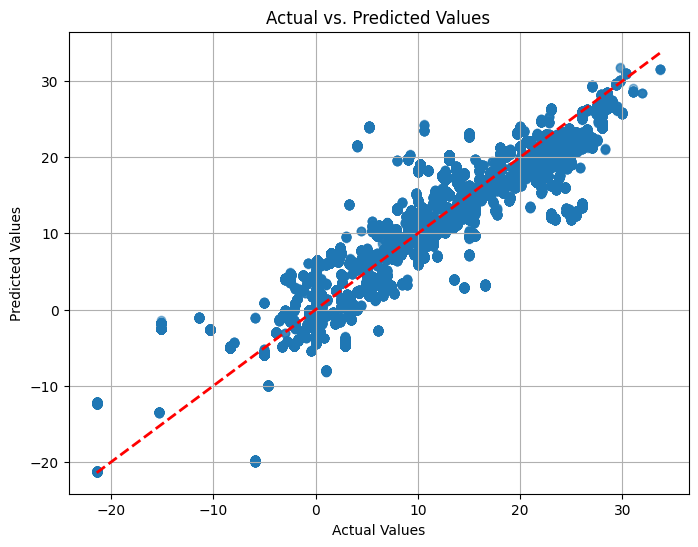

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)


# Show the plot
plt.show()

From above observations we can say that SGDRegression and Linear Regression gives almost same results, Polynomial Regression gives very bad results


The Linear and SGD models explain about 87% of the variance in target variable, so we can say that it is relatively good fit.

MAE for polynomial regresion is the worst.

MAE for other 2 models are far better than polynomial but still not giving precise results.

